### Created by: Anthony D. Cho
### Last update: 27.12.2021

**Subject**: Regression (Keras - Tensorflow) - Applied to QSAR fish toxicity


## Libraries dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from time import time
from pandas import read_csv

## Pre-processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Keras from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

## Regularizer
from tensorflow.keras.regularizers import L2

## Optimizer
from tensorflow.keras.optimizers import Adam

## Customized function

In [2]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

# Problem: QSAR fish toxicity

**Target**: Predict LC50 (Lethal Concentration of 50%)

## Data loading

Source: [QSAR fish toxicity](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity)

In [3]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv', 
                sep=';', header=None)

data.columns = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']

In [4]:
## Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       908 non-null    float64
 1   SM1_Dz(Z)  908 non-null    float64
 2   GATS1i     908 non-null    float64
 3   NdsCH      908 non-null    int64  
 4   NdssC      908 non-null    int64  
 5   MLOGP      908 non-null    float64
 6   LC50       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [5]:
## data description
data.describe(include='all')

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [6]:
data.head(4)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510


## Data pre-processing

In [7]:
## Partition sets
X_train, X_test = train_test_split(data, random_state=20200803)

## Standardizing
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## Predictors and target assignment
y_train = X_train[:, 6]
y_test = X_test[:, 6]
X_train = X_train[:, :6]
X_test = X_test[:, :6]

## Display shape of data
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (681, 6), y: (681,)
(test shape) X: (227, 6), y: (227,)


## Model building

In [8]:
## Model instance
model = Sequential(name='Regression')
model.add(layers.Dense(units=32, 
                       activation='relu', 
                       input_shape=(X_train.shape[1],), 
                       name='HiddenLayer_1'))
model.add(layers.Dropout(0.25, name='Dropout_1'))
model.add(layers.Dense(units=32, 
                       activation='relu',
                       name='HiddenLayer_2'))
model.add(layers.Dropout(0.2, name='Dropout_2'))
model.add(layers.Dense(units=8, 
                       activation='relu', 
                       name='HiddenLayer_3'))
model.add(layers.Dense(units=1, kernel_regularizer=L2(0.0001),
                       name='output'))

## Display model
model.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer_1 (Dense)        (None, 32)                224       
_________________________________________________________________
Dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 32)                1056      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer_3 (Dense)        (None, 8)                 264       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
______________________________________________________

In [9]:
start = time()

## Compiler setting
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mse'])

## model fitting
history = model.fit(x=X_train, y=y_train, 
                    validation_split=0.15,
                    epochs=100, 
                    batch_size=10)

stop = time()
print('Time spent[s]: {:2f}'.format(stop -start))

Epoch 1/100
58/58 [==============================] - 1s 11ms/step - loss: 0.7467 - mse: 0.9056 - val_loss: 0.7206 - val_mse: 0.8761
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6600 - mse: 0.7097 - val_loss: 0.6639 - val_mse: 0.7754
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6233 - mse: 0.6748 - val_loss: 0.6456 - val_mse: 0.7452
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6426 - mse: 0.7013 - val_loss: 0.6141 - val_mse: 0.6899
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6295 - mse: 0.7227 - val_loss: 0.6003 - val_mse: 0.6757
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6035 - mse: 0.6403 - val_loss: 0.5941 - val_mse: 0.6623
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5790 - mse: 0.6323 - val_loss: 0.5741 - val_mse: 0.6214
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5971 - 

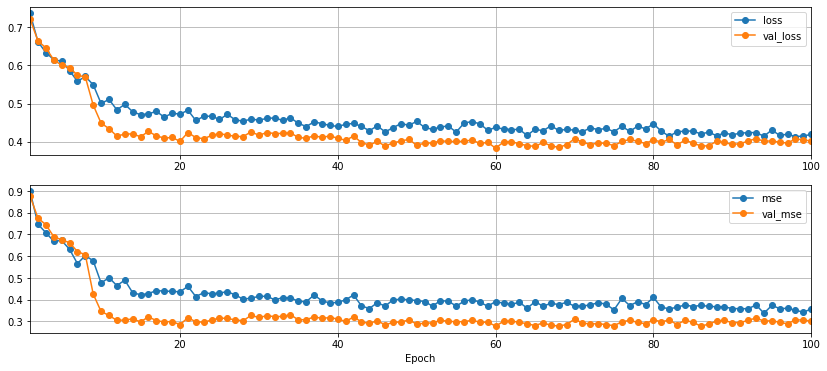

8/8 [==============================] - 0s 2ms/step - loss: 0.5350 - mse: 0.5804


In [10]:
plot_history(history, width=14)

## Compute model evaluation using test set
model.evaluate(X_test, y_test)

## Compute prediction using test set.
prediction = model.predict(X_test)

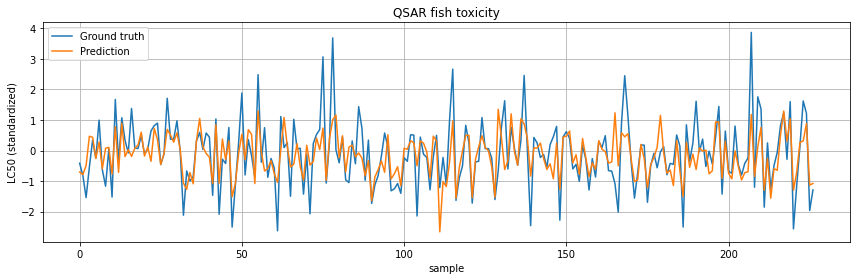

In [11]:
## Display prediction and ground truth
plt.figure(figsize=(12, 4))
plt.plot(y_test, label='Ground truth')
plt.plot(prediction, label='Prediction')
plt.xlabel('sample'); plt.ylabel('LC50 (standardized)')
plt.title('QSAR fish toxicity')
plt.legend(); plt.grid()
plt.tight_layout()
plt.show()


## Best model

Looking into the performance charts, it seems to stabilize (kind of overfit) starting at epoch 60.

In [12]:
## Model instance
model = Sequential(name='Regression')
model.add(layers.Dense(units=32, 
                       activation='relu', 
                       input_shape=(X_train.shape[1],), 
                       name='HiddenLayer_1'))
model.add(layers.Dropout(0.25, name='Dropout_1'))
model.add(layers.Dense(units=32, 
                       activation='relu',
                       name='HiddenLayer_2'))
model.add(layers.Dropout(0.2, name='Dropout_2'))
model.add(layers.Dense(units=8, 
                       activation='relu', 
                       name='HiddenLayer_3'))
model.add(layers.Dense(units=1, kernel_regularizer=L2(0.0001),
                       name='output'))

## Display model
model.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer_1 (Dense)        (None, 32)                224       
_________________________________________________________________
Dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 32)                1056      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer_3 (Dense)        (None, 8)                 264       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
______________________________________________________

In [13]:
start = time()

## Compiler setting
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mse'])

## model fitting
history = model.fit(x=X_train, y=y_train, 
                    epochs=60, 
                    batch_size=10)

stop = time()
print('Time spent[s]: {:2f}'.format(stop -start))

Epoch 1/60
69/69 [==============================] - 1s 1ms/step - loss: 0.7672 - mse: 0.9864
Epoch 2/60
69/69 [==============================] - 0s 1ms/step - loss: 0.5747 - mse: 0.5853
Epoch 3/60
69/69 [==============================] - 0s 1ms/step - loss: 0.5469 - mse: 0.5642
Epoch 4/60
69/69 [==============================] - 0s 1ms/step - loss: 0.5040 - mse: 0.4622
Epoch 5/60
69/69 [==============================] - 0s 1ms/step - loss: 0.5118 - mse: 0.4554
Epoch 6/60
69/69 [==============================] - 0s 1ms/step - loss: 0.5098 - mse: 0.4823
Epoch 7/60
69/69 [==============================] - 0s 1ms/step - loss: 0.4628 - mse: 0.3731
Epoch 8/60
69/69 [==============================] - 0s 1ms/step - loss: 0.5032 - mse: 0.5030
Epoch 9/60
69/69 [==============================] - 0s 1ms/step - loss: 0.4798 - mse: 0.4186
Epoch 10/60
69/69 [==============================] - 0s 1ms/step - loss: 0.4581 - mse: 0.3880
Epoch 11/60
69/69 [==============================] - 0s 1ms/step - lo

In [14]:
## Compute prediction using test set.
prediction = model.predict(X_test)

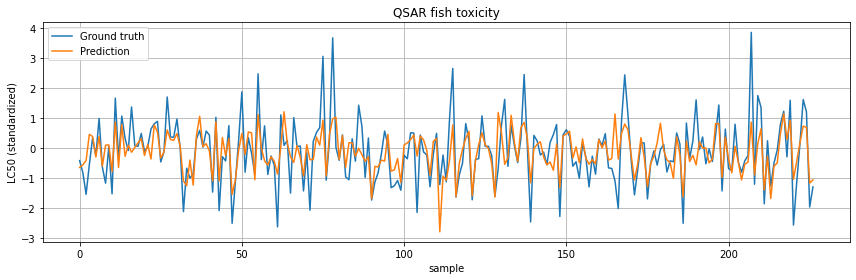

In [15]:
## Display prediction and ground truth
plt.figure(figsize=(12, 4))
plt.plot(y_test, label='Ground truth')
plt.plot(prediction, label='Prediction')
plt.xlabel('sample'); plt.ylabel('LC50 (standardized)')
plt.title('QSAR fish toxicity')
plt.legend(); plt.grid()
plt.tight_layout()
plt.show()